In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
data = pd.read_csv('household_power_consumption.txt', 
                   sep=';', 
                   parse_dates={'Datetime': ['Date', 'Time']}, 
                   infer_datetime_format=True, 
                   na_values=['?'], 
                   low_memory=False)

C:\Users\akhar\AppData\Local\Temp\ipykernel_25288\368087699.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('household_power_consumption.txt',
C:\Users\akhar\AppData\Local\Temp\ipykernel_25288\368087699.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('household_power_consumption.txt',
C:\Users\akhar\AppData\Local\Temp\ipykernel_25288\368087699.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('household_power_consumption.txt',


In [12]:
print(data.head())
print(data.info())

             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):

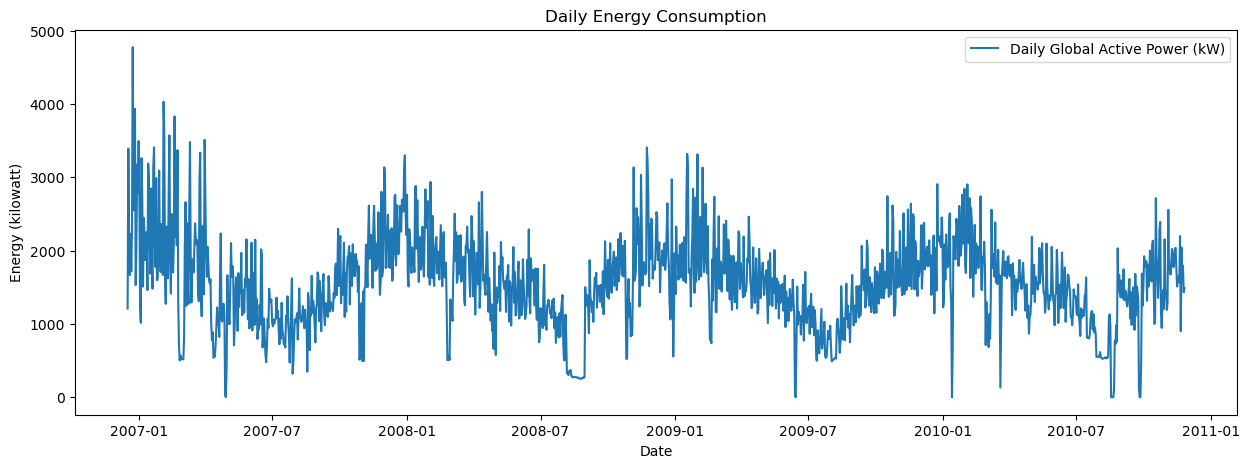

Mean Squared Error: 153688.647
R^2 Score: 0.386


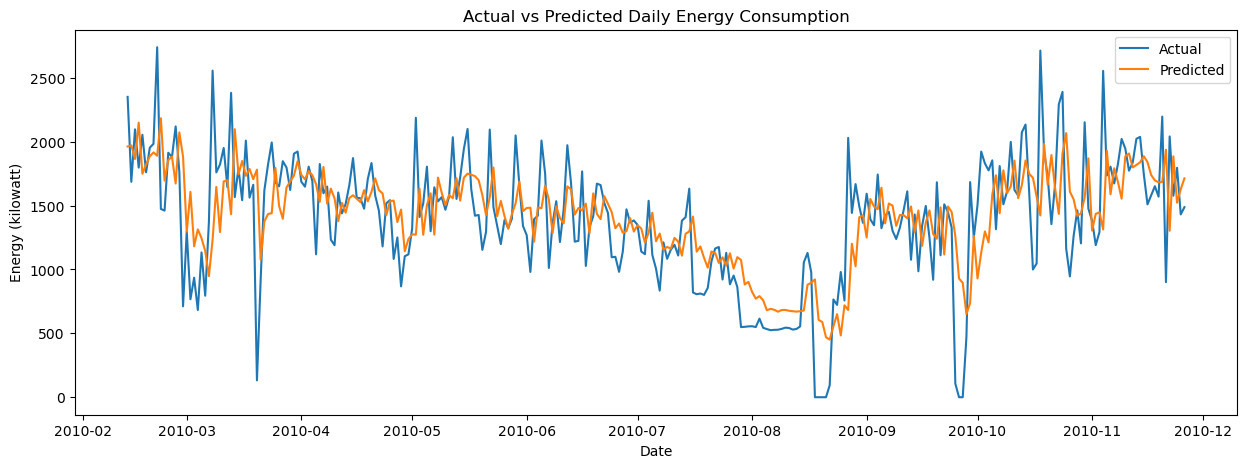

In [13]:
data.dropna(inplace=True)

# Convert columns to numeric (they're objects because of NaNs)
cols = data.columns.drop('Datetime')
data[cols] = data[cols].apply(pd.to_numeric)

# Set datetime as index
data.set_index('Datetime', inplace=True)

# Resample data to daily consumption (sum of Global_active_power)
daily_data = data['Global_active_power'].resample('D').sum()

# Plot daily consumption trend
plt.figure(figsize=(15,5))
plt.plot(daily_data, label='Daily Global Active Power (kW)')
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy (kilowatt)')
plt.legend()
plt.show()

# Prepare data for regression:
# We will predict next day consumption based on previous days consumption.

# Create lag features (previous 7 days)
df = pd.DataFrame(daily_data)
for i in range(1, 8):
    df[f'lag_{i}'] = df['Global_active_power'].shift(i)

df.dropna(inplace=True)

# Define features and target
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(15,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy (kilowatt)')
plt.legend()
plt.show()